In [0]:
import os
os.chdir('/content/drive/My Drive/')

In [0]:
import numpy as np
import pandas as pd
import cupy as cp
import nltk
import spacy
import matplotlib.pyplot as plt
from collections import Counter
import TextPreprocess as TP
import TextVisualize as TV
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords

import logging  

logging.basicConfig(format = "%(levelname)s - %(asctime)s: %(message)s",
                    datefmt = '%H:%M:%S',
                    level = logging.INFO)

In [0]:
# Read the data

Data = pd.read_csv('DataSets/amazon-reviews.csv')
Data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [0]:
# some necessary downloads for later operations

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
# Drop unnecessary columns

columns_to_drop = ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time']
Data = Data.drop(columns = columns_to_drop)
Data.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


Counter({5: 363122, 4: 80655, 1: 52268, 3: 42640, 2: 29769})


363122

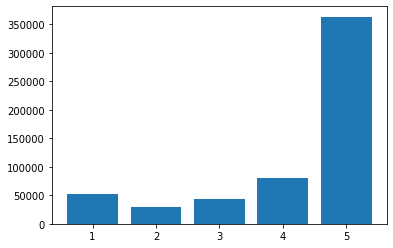

In [0]:
# Visualize distribution of labels

score_count = Counter(Data.Score.values)
print(score_count)
TV.CountHistogram(score_count)
363122

In [0]:
def PreprocessSentence(data):
  """
  Given a sentence of string value, apply necessary preprocessing steps to it so
  that it becomes ready to be fed into the model
  """
  assert isinstance(data, str)

  data = data.lower()
  data = TP.ExpandContractions(data, TP.contractions)
  data = TP.RemoveHTMLTags(data)
  data = TP.RemoveMultipleSpaces(data)
  data = TP.RemoveSpecialChars(data)
  data = TP.RemovePunctuations(data)
  data = TP.LemmatizeWithWordNet(data)

  return data

In [0]:
# Apply preprocessing pipeline on data

Data.Text = Data.Text.apply(lambda x : PreprocessSentence(x))
Data.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,i have bought several of the vitality can dog ...
1,1,Not as Advertised,product arrive label a jumbo salt peanuts...th...
2,4,"""Delight"" says it all",this be a confection that have be around a few...
3,2,Cough Medicine,if you be look for the secret ingredient in ro...
4,5,Great taffy,great taffy at a great price. there be a wide ...


In [0]:
# Drop any rows with NaN values

Data = Data.dropna().reset_index(drop = True)
Data.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,i have bought several of the vitality can dog ...
1,1,Not as Advertised,product arrive label a jumbo salt peanuts...th...
2,4,"""Delight"" says it all",this be a confection that have be around a few...
3,2,Cough Medicine,if you be look for the secret ingredient in ro...
4,5,Great taffy,great taffy at a great price. there be a wide ...


In [0]:
def ExploreData(data):
  """
  This function extracts some info about the given data
  the data is assumed to be in pandas series format
  """
  assert isinstance(data, pd.core.series.Series)

  average_text_length = TP.AverageTextLengthPandas(data)
  print(f'Average character count per Text: {average_text_length}')

  average_word_per_text = TP.AverageWordPerTextPandas(data)
  print(f'Average word count per Text: {average_word_per_text}')

  total_word_count = TP.CountWordsPandas(Data.Text)
  print(f'Total word count: {total_word_count}')


In [0]:
# Explore several stats in data

ExploreData(Data.Text)

436.22208305333413


In [0]:
def VisualizeWordFrequency(data, max_words):
  """
  Given a a pandas series of text values and a maximum number of words, 
  visualize a histogram of the most max_words frequent words in the data
  """

  assert isinstance(data, pd.core.series.Series)
  assert isinstance(max_words, int)

  AllText = TP.AllTextPandas(data)
  text_count = Counter(AllText.split())
  TV.MostFrequentHistogram(text_count, max_words)

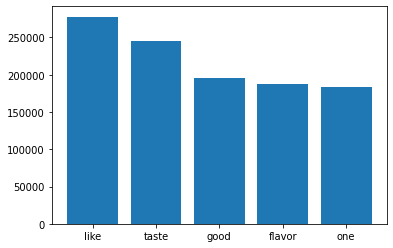

In [0]:
VisualizeWordFrequency(Data.Text, 5)

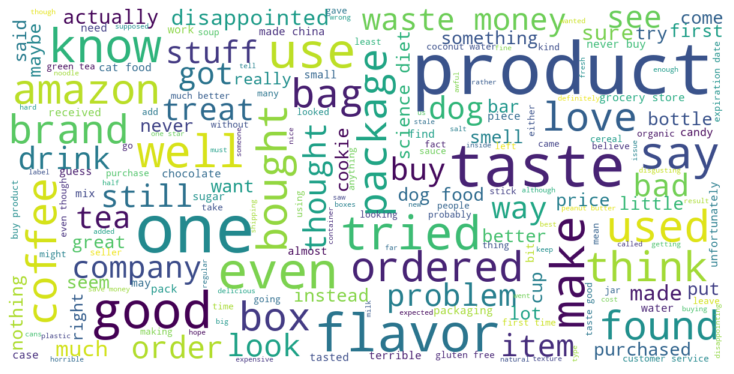

In [0]:
# Word Cloud for reviews of rating 1

Text_R1 = TP.AllTextPandas(Data[Data.Score == 1].Text)
TV.MakeWordCloud(Text_R1)

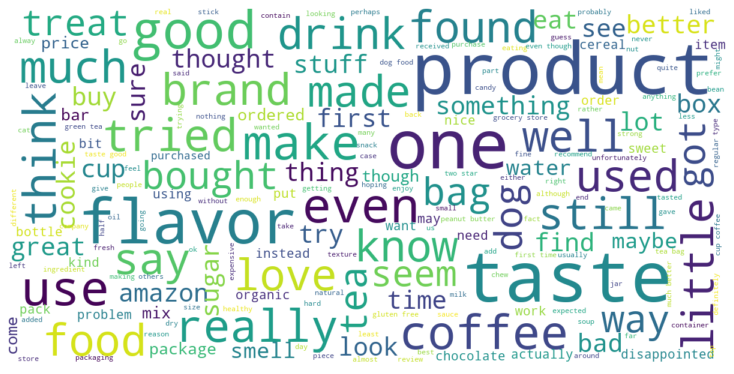

In [0]:
# Word Cloud for reviews of rating 2

Text_R2 = TP.AllTextPandas(Data[Data.Score == 2].Text)
TV.MakeWordCloud(Text_R2)

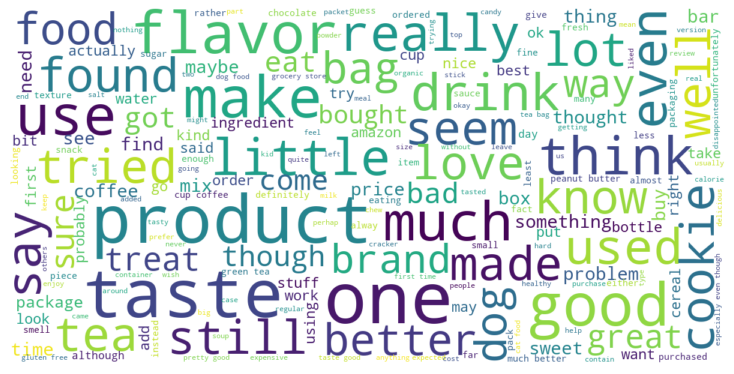

In [0]:
# Word Cloud for reviews of rating 3

Text_R3 = TP.AllTextPandas(Data[Data.Score == 3].Text)
TV.MakeWordCloud(Text_R3)

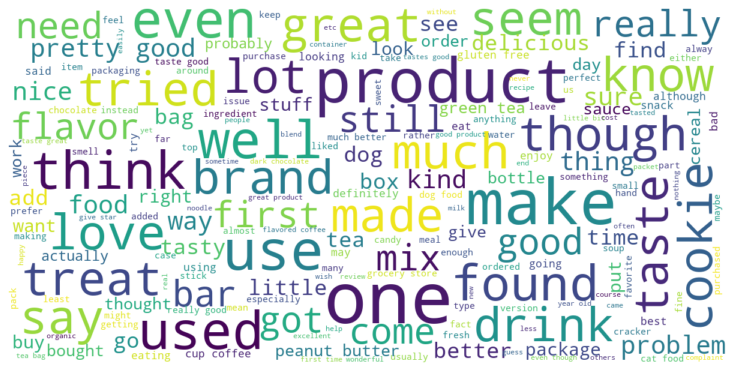

In [0]:
# Word Cloud for reviews of rating 4

Text_R4 = TP.AllTextPandas(Data[Data.Score == 4].Text)
TV.MakeWordCloud(Text_R4)

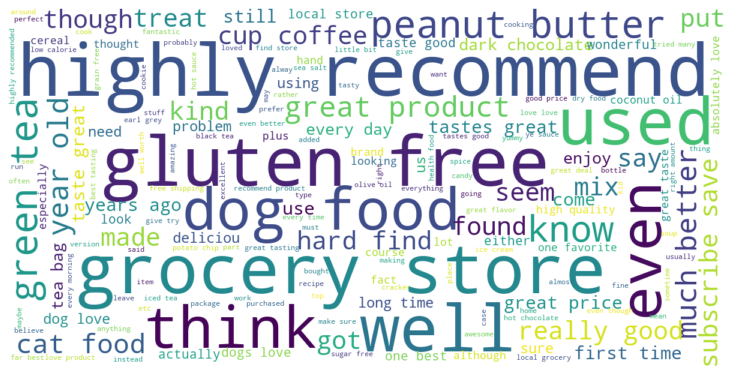

In [0]:
# Word Cloud for reviews of rating 5

Text_R5 = TP.AllTextPandas(Data[Data.Score == 5].Text)
TV.MakeWordCloud(Text_R5)

In [0]:
# save a version that contains stop words

Data.to_csv('Amazon-DataSets/amazon-reviews-cleaned-without-stopwords.csv')

Data = pd.read_csv('DataSets/amazon-review-cleaned-without-stopwords.csv')
Data.head()

In [0]:
# This is used to load data that has been cleaned but still has stop words
# This cell is executed in order 

# Data = pd.read_csv('Amazon-DataSets/amazon-reviews-cleaned-without-stopwords.csv')

In [0]:
def ExpandStopWords(stop_words):
  """
  Given a list of stop words, expand any contractions present in these stop 
  words
  """

  stop_words_expanded = set()
  for element in stop_words:
    stop_words_expanded.add(TP.ExpandContractions(element, TP.contractions))

  return stop_words_expanded

In [36]:
# Explore stop word percentage in both nltk and spacy stop word lists

stop_words_spacy = STOP_WORDS
stop_words_nltk = set(stopwords.words('english'))

total_words_count = TP.CountWordsPandas(Data.Text)
stop_words1 = TP.CountStopWordsPandas(Data.Text, stop_words_nltk)
stop_words2 = TP.CountStopWordsPandas(Data.Text, stop_words_spacy)

print(f'Percentage of nltk stop words in data: {stop_words1 / total_words_count * 100}')
print(f'Percentage of spacy stop words in data: {stop_words2 / total_words_count * 100}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# expand contractions in stop words

stop_words_expanded = ExpandStopWords(stop_words_nltk)

{'by', 'you are', 'mustn', 'wouldn', 'had', 'have not', 'the', 'that', 'ma', 'where', "that'll", 'ours', 'if', 's', 'be', 'you', "you've", 'then', "you'll", 'could not', 'is', 'now', 'who', 'about', 'there', 'at', 'did not', 'shall not', 'up', 'must not', 'y', 'weren', 'was not', 'because', 'm', 'were', 'being', 'which', 'has', 'before', 'on', 'than', 'are', 'or', 'she', 'what', 'shan', 'haven', 'an', 'after', 'wasn', 'no', 're', 'these', 'them', 'why', 'had not', 'more', 'under', 'itself', 'didn', 'ain', 'such', 'should have', 'she is', 'as', 'hers', 'was', 'need not', 'doing', 'his', 'this', 'into', 'am', 'have', 'having', 'herself', 'don', 'can', 'couldn', 'while', 't', 'mightn', 'does not', 'it is', 'will', 'himself', 'only', 'a', 'for', 'me', 'below', 'some', "you'd", 'with', "weren't", 'should not', 'it', 'same', 'its', 'might not', 'those', 'her', 'not', 'their', 've', 'of', 'once', 'both', 'yourself', 'doesn', 'between', 'each', 'very', 'needn', 'and', 'too', 'myself', 'down', 

In [38]:
# Remove stop words based on nltk stop word set

Data.Text = Data.Text.apply(lambda x : TP.RemoveStopWords(x, stop_words_expanded))
Data.head()

,Unnamed: 0,Score,Summary,Text
0,0,5,Good Quality Dog Food,bought several vitality dog food product found...
1,1,1,Not as Advertised,product arrive label jumbo salt peanutsthe pea...
2,2,4,"""Delight"" says it all",confection around centuries light pillowy citr...
3,3,2,Cough Medicine,look secret ingredient robitussin believe foun...
4,4,5,Great taffy,great taffy great price wide assortment yummy ...


In [39]:
# Tokenize words by splitting according to whitespace

Data['Tokens'] = Data.Text.apply(lambda x : x.split())
Data.head()

,Unnamed: 0,Score,Summary,Text,Tokens
0,0,5,Good Quality Dog Food,bought several vitality dog food product found...,"[bought, several, vitality, dog, food, product..."
1,1,1,Not as Advertised,product arrive label jumbo salt peanutsthe pea...,"[product, arrive, label, jumbo, salt, peanutst..."
2,2,4,"""Delight"" says it all",confection around centuries light pillowy citr...,"[confection, around, centuries, light, pillowy..."
3,3,2,Cough Medicine,look secret ingredient robitussin believe foun...,"[look, secret, ingredient, robitussin, believe..."
4,4,5,Great taffy,great taffy great price wide assortment yummy ...,"[great, taffy, great, price, wide, assortment,..."


In [0]:
# N represents the size of training set

N = 28000

In [0]:
# Extract Glove vectors from file

file = "Glove/glove.6B.300d.txt"

glove_weights = {}
with open(file, encoding = "utf-8", mode = "r") as textFile:
    for line in textFile:
        line = line.split()
        word = line[0]
        glove_weights[word] = np.array(line[1:], dtype = np.float32)

In [0]:
def RemoveVectorlessWords(data, mapping):
  """
  Given a list of words, and a map from text to vectors
  remove words from data that do not have corresponding vectors
  """

  assert isinstance(data, list)
  assert isinstance(mapping, dict)

  Ans = []

  for word in data:
    if word in mapping:
      Ans.append(word)

  return Ans

In [43]:
# Remove Words with no corresponding vectors

Data.Tokens = Data.Tokens.apply(lambda x : RemoveVectorlessWords(x, glove_weights))
Data.head()

,Unnamed: 0,Score,Summary,Text,Tokens
0,0,5,Good Quality Dog Food,bought several vitality dog food product found...,"[bought, several, vitality, dog, food, product..."
1,1,1,Not as Advertised,product arrive label jumbo salt peanutsthe pea...,"[product, arrive, label, jumbo, salt, peanut, ..."
2,2,4,"""Delight"" says it all",confection around centuries light pillowy citr...,"[confection, around, centuries, light, pillowy..."
3,3,2,Cough Medicine,look secret ingredient robitussin believe foun...,"[look, secret, ingredient, robitussin, believe..."
4,4,5,Great taffy,great taffy great price wide assortment yummy ...,"[great, taffy, great, price, wide, assortment,..."


In [0]:
def ReverseMapping(mapping):
  """
  This function simply takes a map and returns its inverse
  it assumes that the mapping is one-to-one
  """

  assert isinstance(mapping, dict)

  R = {}

  for key in mapping.keys():
    R[mapping[key]] = key

  return R

In [0]:
def MakeWordToIndex(data):
    """
    Given a list of sentences, where each sentence is a list of words,
    and the words are preprocessed, return a dictionary of (word -> index)
    """
    assert isinstance(data, np.ndarray) or isinstance(data, list)
    
    wordToIndex = {}
    index = 0
    
    for sentence in data:
        for word in sentence:
            if not word in wordToIndex:
                wordToIndex[word] = index
                index += 1
    
    return wordToIndex

In [47]:
# Create Vocabulary mapping represented as WordToIndex map

AllTokens = [sentence for sentence in Data.Tokens.values]
WordToIndex = MakeWordToIndex(AllTokens)
print(len(WordToIndex))

57366


In [0]:
# IndexToWord Mapping can be also useful when setting up the pretrained vectors

IndexToWord = ReverseMapping(WordToIndex)

In [0]:
# label to index map makes it easier for preparing labels for training

LabelToIndex = {1:0,2:1,3:2,4:3,5:4}

In [0]:
# separate each of the classes to its own data frame to control number of 
# instances

Data1 = Data[Data.Score == 1]
Data2 = Data[Data.Score == 2]
Data3 = Data[Data.Score == 3]
Data4 = Data[Data.Score == 4]
Data5 = Data[Data.Score == 5]

In [51]:
# have a look at exact sizes of each class

print(Data1.shape)
print(Data2.shape)
print(Data3.shape)
print(Data4.shape)
print(Data5.shape)

(52268, 5)
(29744, 5)
(42638, 5)
(80655, 5)
(363122, 5)


In [52]:
# Pretrained vectors chosen are those who are only present in the IndexToWord mapping

PretrainedVectors = np.concatenate([glove_weights[IndexToWord[vec]].reshape(1,-1) for vec in IndexToWord.keys()])
print(PretrainedVectors.shape)

(57366, 300)


In [0]:
# define Parameters class to simplify parameters handling

class Parameters:
    """
    This class encapsulates all necessary parameters for training 
    """    
    def __init__(self, embedding_n, hidden_n, vocab_n, label_n, learning_rate, epochs):
        
        self.embedding_n = embedding_n
        self.hidden_n = hidden_n
        self.vocab_n = vocab_n
        self.label_n = label_n
        self.learning_rate = learning_rate
        self.epochs = epochs

In [0]:
# now import necessary libraries to create the model

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import random

In [0]:
class LSTMClassifier(nn.Module):
    """
    This class encapsulate the LSTM model
    """
    def __init__(self, embedding_n, hidden_n, vocab_n, label_n, pretrained_vectors):
        super(LSTMClassifier, self).__init__()
        
        self.embeding_n = embedding_n
        self.hidden_n = hidden_n
        self.vocab_n = vocab_n
        self.label_n = label_n
        
        # load pretrained vectors, and freeze those, in order to decrease
        # the number of required parameters
        self.embeddings = nn.Embedding.from_pretrained(torch.from_numpy(pretrained_vectors).cuda(), freeze = True)
        self.lstm = nn.LSTM(embedding_n, hidden_n)
        self.linear = nn.Linear(hidden_n, label_n)
        self.hidden = self.init_hidden()
        
    def init_hidden(self):
      """
      initializes the hidden state
      """
      return (torch.zeros(1, 1, self.hidden_n).cuda(),
              torch.zeros(1, 1, self.hidden_n).cuda())
    
    def forward(self, sentence):
        
        data = self.embeddings(sentence)
        data = data.view(len(sentence), 1, -1)
        
        lstm_out, self.hidden = self.lstm(data, self.hidden)
        
        out = self.linear(lstm_out[-1])
        
        log_p = F.log_softmax(out, dim = 1)
        
        return log_p
        

In [0]:
def EncodeData(data, mapping):
    """
    this function takes a list of words, and maps these words to their
    corresponding indices based on the provided mapping, it specifically
    return a torch tensor on the gpu, this is immediately before the data
    is fed into the model
    """  
    assert isinstance(data, list)
    
    Res = []
    
    for word in data:
      if word in mapping:
        Res.append(mapping[word])
        
    Res = np.array(Res, dtype = int)
        
    return torch.from_numpy(Res).cuda()

In [0]:
def EncodeLabel(data, mapping):
  """
  Given a label and the label mapping, return the index corresponding
  to the label as torch tensor on gpu, this is to prepare to be used
  in the model training
  """

  return torch.LongTensor([mapping[data]]).cuda()

In [58]:
# create the training data by taking the first N of each class and concatenating
# all of them together and then shuffling them

DataTraining = pd.concat([Data1.iloc[:N], Data2.iloc[:N], Data3.iloc[:N], Data4.iloc[:N], Data5.iloc[:N]])
DataTraining = DataTraining.sample(frac = 1).reset_index(drop = True)
DataTraining.head()

,Unnamed: 0,Score,Summary,Text,Tokens
0,135688,4,"a dark chocolate lovers' delight, a blueberry ...",cocoa ingredient label chocolate peanut butter...,"[cocoa, ingredient, label, chocolate, peanut, ..."
1,242383,1,Salt Soup,product arrive shock see best date less 2 mont...,"[product, arrive, shock, see, best, date, less..."
2,311129,2,a bit disappointed...,purchase enjoy stash brand tea yearsthough nev...,"[purchase, enjoy, stash, brand, tea, never, mi..."
3,21842,1,Tug-a-Jug lasts 5 minutes.,disappointed tugajug come mail today dog 5 min...,"[disappointed, come, mail, today, dog, 5, minu..."
4,16813,5,Best one yet!,love far try watermelon cherry kiwi favorite o...,"[love, far, try, watermelon, cherry, kiwi, fav..."


In [59]:
# create testing data by taking the remaining instances from all classes
# and shuffling them

DataTest = pd.concat([Data1.iloc[N:], Data2.iloc[N:], Data3.iloc[N:], Data4.iloc[N:], Data5.iloc[N:]])
DataTest = DataTest.sample(frac = 1).reset_index(drop = True)
print(DataTest.shape)
DataTest.head()

(428427, 5)


,Unnamed: 0,Score,Summary,Text,Tokens
0,245001,5,Great Product,product great well reasonably priced husband d...,"[product, great, well, reasonably, priced, hus..."
1,467272,5,Best Homemade coffee!,say mastro lorenze crema best homemade coffee ...,"[say, mastro, crema, best, homemade, coffee, e..."
2,536235,4,good product,like breakfast thought would fun try baby vers...,"[like, breakfast, thought, would, fun, try, ba..."
3,239616,5,what a flavor!,herr ketchupflavored chip first hit market rem...,"[herr, chip, first, hit, market, remember, tak..."
4,289142,4,Great Product!,great high quality product enjoy use againi tr...,"[great, high, quality, product, enjoy, use, tr..."


In [60]:
# create tuples of (data, label) to be used in training

TrainingData = [(A[3],A[0]) for A in DataTraining.values]
print(TrainingData[2])

(['purchase', 'enjoy', 'stash', 'brand', 'tea', 'never', 'mix', 'green', 'black', 'chai', 'surprisingly', 'disappointed', 'blend', 'definitely', 'taste', 'green', 'tea', 'taste', 'chai', 'weak', 'blend', 'spice', 'compare', 'usually', 'enjoy', 'chai', 'felt', 'confident', 'obviously', 'place', 'order', 'many', 'boxes', 'wish', 'could', 'exchange', 'return', 'try', 'doctor', 'add', 'spice', 'kitchen', 'cupboard', 'help', 'little', 'though', 'decide', 'give', 'away', 'friend', 'family', 'might', 'enjoy'], 2)


In [61]:
# create tuples of (data, label) to be used in validating or testing

TestingData = [(A[3], A[0]) for A in DataTest.values]
print(TestingData[0])

(['product', 'great', 'well', 'reasonably', 'priced', 'husband', 'drink', 'time', 'problem', 'milk', 'love', 'also', 'easy', 'mix'], 5)


In [0]:
# define the parameters required for training

params = Parameters(
    embedding_n = 300, 
    hidden_n = 256, 
    vocab_n = len(WordToIndex),
    label_n = 5,
    learning_rate = 1e-4,
    epochs = 100
)

In [0]:
def CreateModel(training_data, params, pretrained_vectors):
    """
    This function takes the training data, the parameters wrapper, and 
    the pretrained vectors. It creates the model, trains is according to the
    parameters and then returns the resulting model and an array of losses
    over even runs of epochs
    """   

    # create the model
    model = LSTMClassifier(params.embedding_n, params.hidden_n, params.vocab_n, params.label_n, pretrained_vectors)

    # prepare model to work on gpu
    model.cuda()

    loss_function = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr = params.learning_rate)

    total_loss = []

    for i in range(params.epochs):
    
        epoch_loss = 0.0
        random.shuffle(training_data)
    
        for j in range(len(training_data)):
        
            model.zero_grad()
        
            model.hidden = model.init_hidden()

            # prepare data and label
            sentence = EncodeData(training_data[j][0], WordToIndex)
            label = EncodeLabel(training_data[j][1], LabelToIndex)
            
            score = model(sentence)
        
            loss = loss_function(score, label)

            epoch_loss += loss.item()

            loss.backward()
        
            optimizer.step()
        
        if i % 2 == 1:
            loss = epoch_loss / len(training_data)
            print("Epoch: %d, loss: %1.5f" %(i + 1, loss))
            total_loss.append(loss)
            
    return model, total_loss

In [0]:
# Model 2: learning rate = 1e-2, hidden size = 256, acc = 43.0, epochs = 20
# Model 3: learning rate = 1e-3, hidden size = 256, acc = 47.0, epochs = 20
# Model 4: learning rate = 1e-3, hidden size = 400, acc = 48.7, epochs = 40
# Model 5: learning rate = 1e-4, hidden size = 400, acc = 55.5, epochs = 10
# Model 6: learning rate = 1e-4, hidden size = 256, acc = 60  , epochs = 20
# Model 7: learning rate = 1e-4, hidden size = 256, acc = 65  , epochs = 66

In [0]:
# train the model

model , total_loss = CreateModel(TrainingData, params, PretrainedVectors)

Epoch: 2, loss: 1.09455
Epoch: 4, loss: 0.84484
Epoch: 6, loss: 0.59814
Epoch: 8, loss: 0.38142
Epoch: 10, loss: 0.22455
Epoch: 12, loss: 0.13572
Epoch: 14, loss: 0.09308
Epoch: 16, loss: 0.07531
Epoch: 18, loss: 0.06436
Epoch: 20, loss: 0.05819
Epoch: 22, loss: 0.05514
Epoch: 24, loss: 0.05188
Epoch: 26, loss: 0.04857
Epoch: 28, loss: 0.04655
Epoch: 30, loss: 0.04614
Epoch: 32, loss: 0.04391
Epoch: 34, loss: 0.04160
Epoch: 36, loss: 0.04090
Epoch: 38, loss: 0.04027
Epoch: 40, loss: 0.03842
Epoch: 42, loss: 0.03833
Epoch: 44, loss: 0.03756
Epoch: 46, loss: 0.03758
Epoch: 48, loss: 0.03551
Epoch: 50, loss: 0.03628
Epoch: 52, loss: 0.03549
Epoch: 54, loss: 0.03456
Epoch: 56, loss: 0.03383
Epoch: 58, loss: 0.03318
Epoch: 60, loss: 0.03278
Epoch: 62, loss: 0.03303
Epoch: 64, loss: 0.03385
Epoch: 66, loss: 0.03437


In [0]:
plt.plot(total_loss)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [0]:
 torch.save(model,'Amazon-DataSets/model7.pt')

In [0]:
def EvaluateAccuracy(data, model):
  """
  given a data that is a list of tuples (data, label), and a model
  evaluate the accuracy of the data in this list 
  """
  model.eval()
  den = len(data)
  num = 0

  for i in range(den):

    sentence = EncodeData(data[i][0], WordToIndex)
    label = EncodeLabel(data[i][1], LabelToIndex)

    score = model(sentence)

    choice = score.cpu().detach().numpy().argmax()

    if choice == data[i][1] - 1:
      num += 1

  print(f"Accuracy: {100.0 * num / den}")

In [0]:
model = torch.load('Amazon-DataSets/model5.pt')

In [0]:
testing_N = 80000
EvaluateAccuracy(TestingData[:testing_N], model)